# Анализ точности работы алгоритма Монте-Карло

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1 = pd.read_csv('annealing_method_1.csv')
df2 = pd.read_csv('annealing_method_2.csv')

In [14]:
df1

,num_of_points,area
0,100,0.583328
1,600,0.777771
2,1100,0.989890
3,1600,0.923603
4,2100,0.976843
...,...,...
195,97600,0.946514
196,98100,0.950312
197,98600,0.952888
198,99100,0.938858


**df1** - хранит площади, полученные генерацией точек в широкой прямоугольной области, которая охватывает все три круга полностью.

In [15]:
df2

,num_of_points,area
0,100,0.912500
1,600,0.925000
2,1100,0.927273
3,1600,0.956250
4,2100,0.948214
...,...,...
1995,997600,0.944707
1996,998100,0.944866
1997,998600,0.944511
1998,999100,0.944634


**df2** - хранит площади, полученные путем случайной генерации точек в узкой прямоугольной области, которая более <<плотно>> ограничивает пересечение трех кругов

### Вычисление точной площади пересечения кругов

In [16]:
S = 0.25 * np.pi + 1.25 * np.arcsin(0.8) - 1
print(f'Точная площадь пересечения 3х окружностей - {S}')

Точная площадь пересечения 3х окружностей - 0.9445171858994637


### Построение графиков

#### График изменения площади относительно количества сгенерированных точек

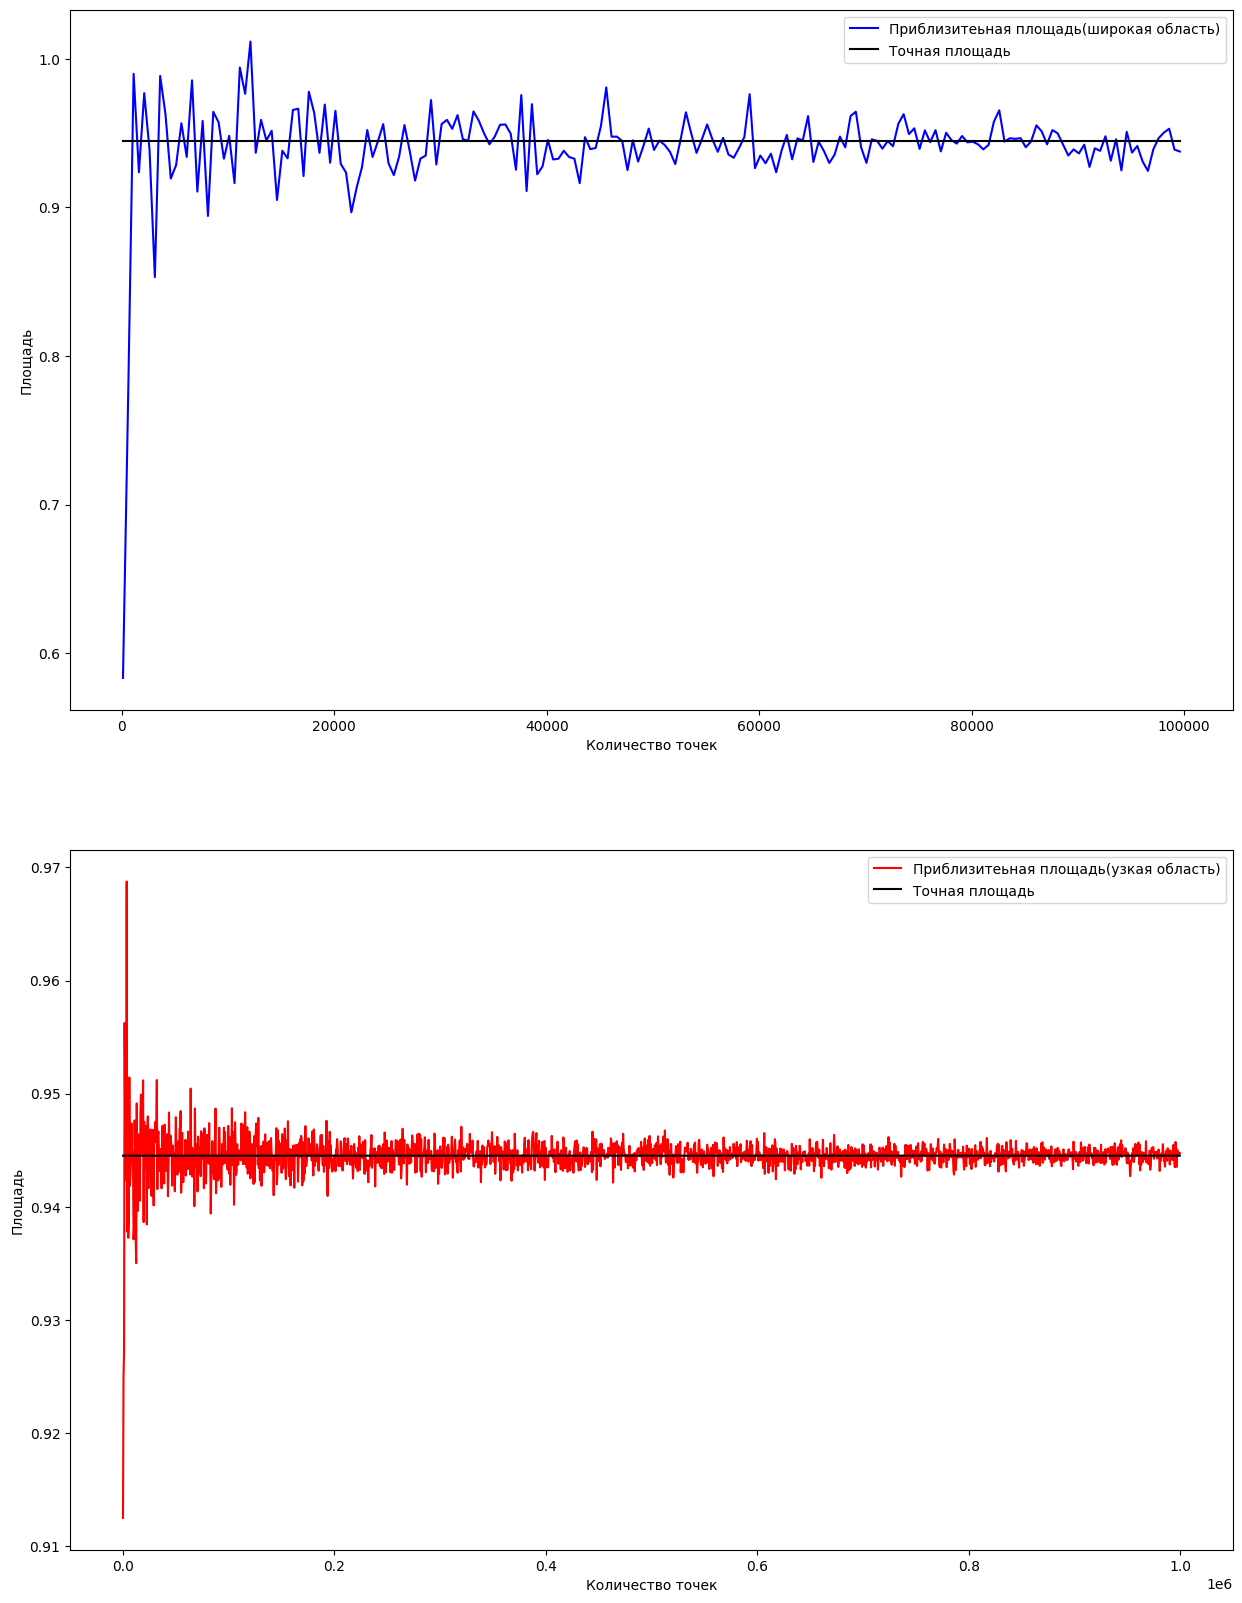

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 20))

axes[0].plot(df1['num_of_points'], df1['area'], label='Приблизитеьная площадь(широкая область)', color='b')
axes[0].plot(df1['num_of_points'], [S] * len(df1['num_of_points']), label='Точная площадь', color='black')
axes[0].set_xlabel('Количество точек')
axes[0].set_ylabel('Площадь')
axes[0].legend()

axes[1].plot(df2['num_of_points'], df2['area'], label='Приблизитеьная площадь(узкая область)', color='r')
axes[1].plot(df2['num_of_points'], [S] * len(df2['num_of_points']), label='Точная площадь', color='black')
axes[1].set_xlabel('Количество точек')
axes[1].set_ylabel('Площадь')
axes[1].legend()

plt.show()

#### График изменения относительного отклонения площади

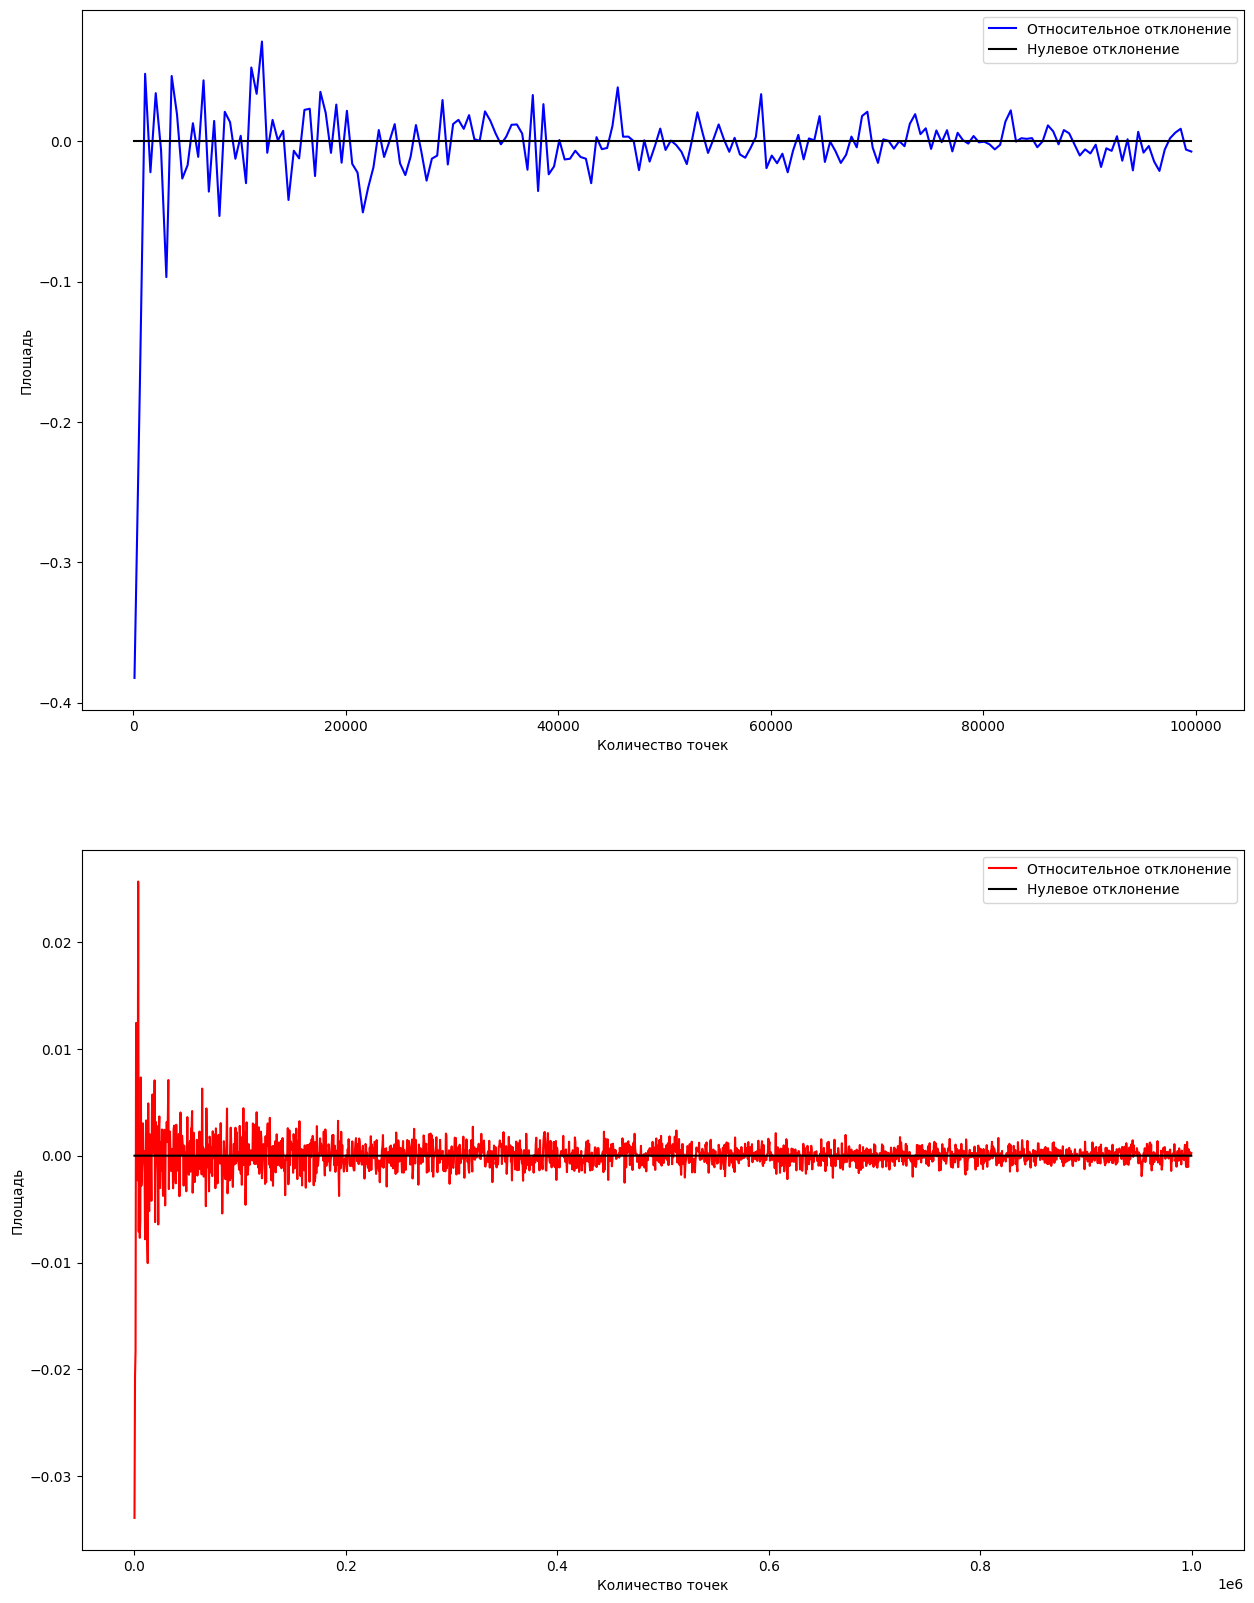

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 20))

axes[0].plot(df1['num_of_points'], (df1['area'] - S) / S, label='Относительное отклонение', color='b')
axes[0].plot(df1['num_of_points'], [0] * len(df1['area']), label='Нулевое отклонение', color='black')
axes[0].set_xlabel('Количество точек')
axes[0].set_ylabel('Площадь')
axes[0].legend()

axes[1].plot(df2['num_of_points'], (df2['area'] - S) / S, label='Относительное отклонение', color='r')
axes[1].plot(df2['num_of_points'], [0] * len(df2['area']), label='Нулевое отклонение', color='black')
axes[1].set_xlabel('Количество точек')
axes[1].set_ylabel('Площадь')
axes[1].legend()

plt.show()

Видно, что при генерации точек внутри широкой области разборос отностильно точной площади намного сильнее, чем при генерации внутри узкой области. Более того, видно, что отклонения в первом случае сильно выше, но видна некоторая сходимость к значению S при увелечении количества точек генерации, ибо отклонение уменьшается, что ожидаемо.

Во втором случае видна более явная сходимость к значению S, ибо разборос даже на малом количестве генерируемых точек сильно меньше требуемой точности(в несколько раз).

Выводы:
- Использование локальных областей явно улучшает точность и уменьшает ошибку. Их использование в разы выгоднее, чем использование больших областей. Их минус, что их нужно аккурантно высчитывать(даже если мы делаем это приблизительно).
- Увеличение количества генерируемых точек очевидным образом увеличивает точность и уменьшает отклонения.